# Find two best markets to advertise in
We're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. In this project, we'll find out the two best markets to advertise our product in 

In [1]:
import pandas as pd
data = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv", low_memory=False)
print(data.shape, "\n")
print(data.head())

(18175, 136) 

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN  

Three questions to learn:
1. Where are these new coders located.
2. What are the locations with the greatest number of new coders.
3. How much money new coders are willing to spend on learning.

In [2]:
# Calculate the frequency distribution of the roles that participants are interested in working
job_freq_table = pd.DataFrame(data["JobRoleInterest"].value_counts(normalize = True) * 100)
print(job_freq_table)

                                                    JobRoleInterest
Full-Stack Web Developer                                  11.770595
  Front-End Web Developer                                  6.435927
  Data Scientist                                           2.173913
Back-End Web Developer                                     2.030892
  Mobile Developer                                         1.673341
Game Developer                                             1.630435
Information Security                                       1.315789
Full-Stack Web Developer,   Front-End Web Devel...         0.915332
  Front-End Web Developer, Full-Stack Web Devel...         0.800915
  Product Manager                                          0.786613
Data Engineer                                              0.758009
  User Experience Designer                                 0.743707
  User Experience Designer,   Front-End Web Dev...         0.614989
  Front-End Web Developer, Back-End Web Develop.

A lot of people are interested in web development (Full-Stack Web Developer + Front-End Web Developer + Back-End Web Developer, slightly higher than 20%, excluding those with more than one interests).
Some of people are interested in mobile development (1.67%).
There exist many people interested in other domains. This data set is still representative.
Also, a lot of people are interested in more than one subject.

In [3]:
# Drop rows with NaN and split
job_interests = data['JobRoleInterest'].dropna().str.split(",")

# Generate the frequency table for the number of interests
job_interests.apply(lambda x: len(x)).value_counts(normalize = True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

In [4]:
print(data["JobRoleInterest"].str.contains("Web Developer|Mobile Developer").value_counts(normalize = True))

True     0.862414
False    0.137586
Name: JobRoleInterest, dtype: float64


In [5]:
# Analyze the locations
# Drop rows with NaN
data_filtered = data[data["JobRoleInterest"].notnull()].copy()

loc_freq_table = pd.DataFrame(data = {"absolute": data_filtered["CountryLive"].value_counts(normalize = True),
                                      "relative": data_filtered["CountryLive"].value_counts()})
print(loc_freq_table)

                               absolute  relative
United States of America       0.457005      3125
India                          0.077216       528
United Kingdom                 0.046066       315
Canada                         0.038023       260
Poland                         0.019158       131
Brazil                         0.018865       129
Germany                        0.018280       125
Australia                      0.016379       112
Russia                         0.014917       102
Ukraine                        0.013016        89
Nigeria                        0.012284        84
Spain                          0.011261        77
France                         0.010968        75
Romania                        0.010383        71
Netherlands (Holland, Europe)  0.009506        65
Italy                          0.009067        62
Serbia                         0.007605        52
Philippines                    0.007605        52
Greece                         0.006727        46


US accounts for more than 40% while India, UK, and Canada follow with 7.7%, 4.6%, and 3.8%.

In [6]:
# Analyze the money spend
data_filtered["MonthsProgramming"].replace(0, 1, inplace = True)

data_filtered["MoneyPerMonth"] = data_filtered["MoneyForLearning"] / data_filtered["MonthsProgramming"]

print(sum(data_filtered["MoneyPerMonth"].isnull()))

data_filtered_v2 = data_filtered[data_filtered["MoneyPerMonth"].notnull()]
data_filtered_v3 = data_filtered_v2[data_filtered_v2["CountryLive"].notnull()]

data_filtered_v3["CountryLive"].value_counts()

675


United States of America         2933
India                             463
United Kingdom                    279
Canada                            240
Poland                            122
Germany                           114
Brazil                            111
Australia                         102
Ukraine                            79
Russia                             79
Nigeria                            72
Spain                              66
Romania                            65
France                             62
Netherlands (Holland, Europe)      59
Italy                              52
Serbia                             44
Philippines                        43
Ireland                            41
Greece                             40
South Africa                       36
Mexico                             33
Turkey                             31
Norway                             30
Argentina                          30
New Zealand                        30
Hungary     

In [7]:
mean_by_country = data_filtered_v3.groupby("CountryLive").mean()
print(mean_by_country["MoneyPerMonth"][["United States of America", "India",
                                        "United Kingdom", "Canada"]])

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MoneyPerMonth, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



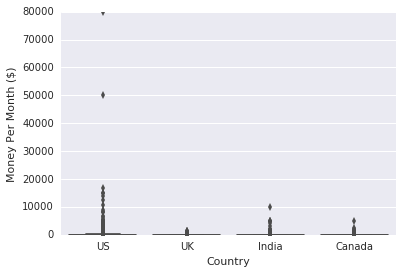

In [8]:
# Boxplots for these four countries
data_filtered_v4 = data_filtered_v3[data_filtered_v3["CountryLive"].str.contains("United States of America|India|United Kingdom|Canada")]

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.boxplot(y = "MoneyPerMonth", x = "CountryLive", data = data_filtered_v4)
plt.ylabel("Money Per Month ($)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: MoneyPerMonth, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



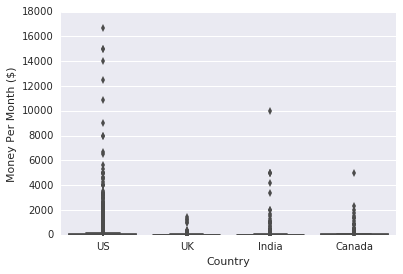

In [9]:
# Remove outliers with MoneyPerMonth > 20000
data_filtered_v5 = data_filtered_v4[data_filtered_v4["MoneyPerMonth"] < 20000]

print(data_filtered_v5.groupby("CountryLive").mean()["MoneyPerMonth"])

sns.boxplot(y = "MoneyPerMonth", x = "CountryLive", data = data_filtered_v5)
plt.ylabel("Money Per Month ($)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

In [10]:
outliers_ind = data_filtered_v5[(data_filtered_v5["CountryLive"] == "India") & 
                                (data_filtered_v5["MoneyPerMonth"] >= 2500)]
print(outliers_ind)

data_filtered_v5 = data_filtered_v5.drop(outliers_ind.index)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
1728   24.0               0.0             NaN                NaN          NaN   
1755   20.0               0.0             NaN                NaN          NaN   
7989   28.0               0.0             NaN                NaN          NaN   
8126   22.0               0.0             NaN                NaN          NaN   
13398  19.0               0.0             NaN                NaN          NaN   
15587  27.0               0.0             NaN                NaN          NaN   

       BootcampRecommend  ChildrenNumber                 CityPopulation  \
1728                 NaN             NaN  between 100,000 and 1 million   
1755                 NaN             NaN            more than 1 million   
7989                 NaN             NaN  between 100,000 and 1 million   
8126                 NaN             NaN            more than 1 million   
13398                NaN             NaN            more 

In [11]:
outliers_us = data_filtered_v5[(data_filtered_v5["CountryLive"] == "United States of America") & 
                                (data_filtered_v5["MoneyPerMonth"] >= 6000)]
print(outliers_us)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo  \
718    26.0               1.0             0.0                0.0   
1222   32.0               1.0             0.0                0.0   
3184   34.0               1.0             1.0                0.0   
3930   31.0               0.0             NaN                NaN   
6805   46.0               1.0             1.0                1.0   
7198   32.0               0.0             NaN                NaN   
7505   26.0               1.0             0.0                1.0   
9778   33.0               1.0             0.0                1.0   
16650  29.0               0.0             NaN                NaN   
16997  27.0               0.0             NaN                NaN   
17231  50.0               0.0             NaN                NaN   

                                 BootcampName  BootcampRecommend  \
718    The Coding Boot Camp at UCLA Extension                1.0   
1222                            The Iron Yard  

In [12]:
outliers_ca = data_filtered_v5[(data_filtered_v5["CountryLive"] == "Canada") & 
                                (data_filtered_v5["MoneyPerMonth"] >= 4500)]
print(outliers_ca)

data_filtered_v5 = data_filtered_v5.drop(outliers_ca.index)

        Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
13659  24.0               1.0             0.0                0.0      Bloc.io   

       BootcampRecommend  ChildrenNumber       CityPopulation  \
13659                1.0             NaN  more than 1 million   

       CodeEventConferences  CodeEventDjangoGirls      ...        \
13659                   1.0                   NaN      ...         

       YouTubeFunFunFunction  YouTubeGoogleDev  YouTubeLearnCode  \
13659                    NaN               NaN               NaN   

       YouTubeLevelUpTuts  YouTubeMIT  YouTubeMozillaHacks  YouTubeOther  \
13659                 NaN         1.0                  NaN           NaN   

      YouTubeSimplilearn  YouTubeTheNewBoston  MoneyPerMonth  
13659                NaN                  NaN         5000.0  

[1 rows x 137 columns]


In [13]:
outliers_us_1 = data_filtered_v5[(data_filtered_v5["CountryLive"] == "United States of America") & 
                                (data_filtered_v5["MoneyPerMonth"] >= 6000) &
                                (data_filtered_v5["AttendedBootcamp"] == 0)]

data_filtered_v5 = data_filtered_v5.drop(outliers_us_1.index)

outliers_us_2 = data_filtered_v5[(data_filtered_v5["CountryLive"] == "United States of America") & 
                                (data_filtered_v5["MoneyPerMonth"] >= 6000) &
                                (data_filtered_v5["MonthsProgramming"] <= 3)]


data_filtered_v5 = data_filtered_v5.drop(outliers_us_2.index)

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64
United States of America    0.749679
India                       0.117330
United Kingdom              0.071630
Canada                      0.061361
Name: CountryLive, dtype: float64


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



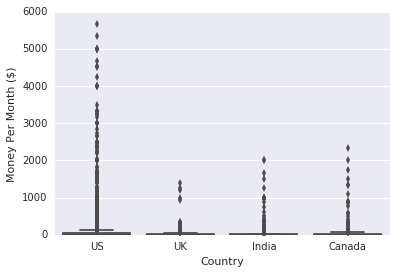

In [15]:
# Show the final results
print(data_filtered_v5.groupby("CountryLive").mean()["MoneyPerMonth"])
print(data_filtered_v5["CountryLive"].value_counts(normalize = True))

sns.boxplot(y = "MoneyPerMonth", x = "CountryLive", data = data_filtered_v5)
plt.ylabel("Money Per Month ($)")
plt.xlabel("Country")
plt.xticks(range(4), ["US", "UK", "India", "Canada"])
plt.show()

1st: US, 2nd: 